# <span style="color:lightseagreen">Culex tarsalis Reference Genome Phylogenetic Inferences & Protein Prediction:<br>Linking Orthogroup IDs to Functional Descriptions</span>
***
#### 2021 - 2022 Academic Year
***

In [2]:
import pandas as pd
import numpy as np

### <span style="color:lightseagreen">Orthogroups & Phylogenetic Inferences With OrthoFinder</span>
In order to calculate comparative genomics, OrthoFinder [[1]](https://doi.org/10.1186/s13059-019-1832-y) was used to find orthogroups, orthologs, rooted gene/species trees, and gene duplication events. For the purposes of this project, information on which protein accessions were in which orthogroup was collected, species trees were examined using Dendroscope [[2]](https://academic.oup.com/sysbio/article/61/6/1061/1666897), and gene duplications events were analized. OrthoFinder V2.4.0 and Dendroscope V3.8.3 were used.

In [2]:
%%script bash --bg

module load orthofinder

orthofinder -f ./MosProteinFASTAsFolder

#### Gene Duplication Events Species Tree:
A summation of identified orthogroup node gene duplication events with at least 50% support over the branches of the species tree.
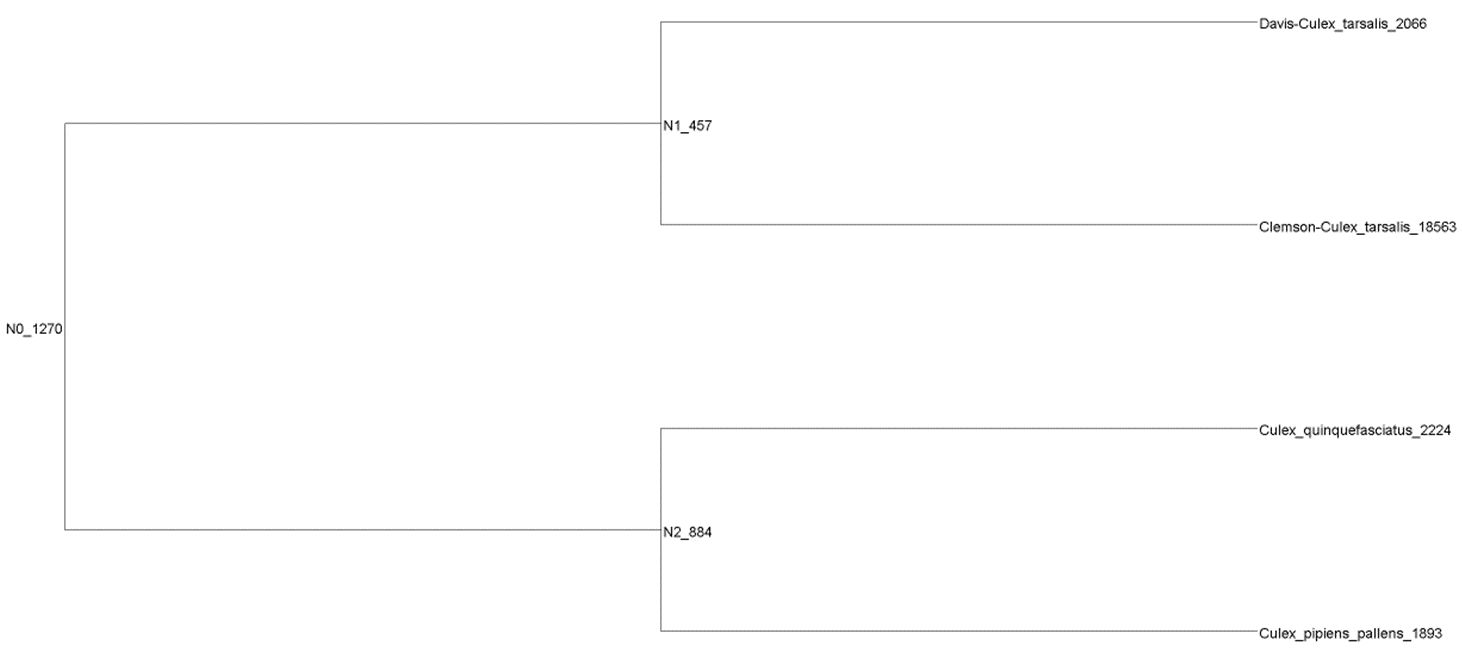
***
#### Species Tree:
A STAG (Species Tree inference from All Genes) species tree conclded from all orthogroups.
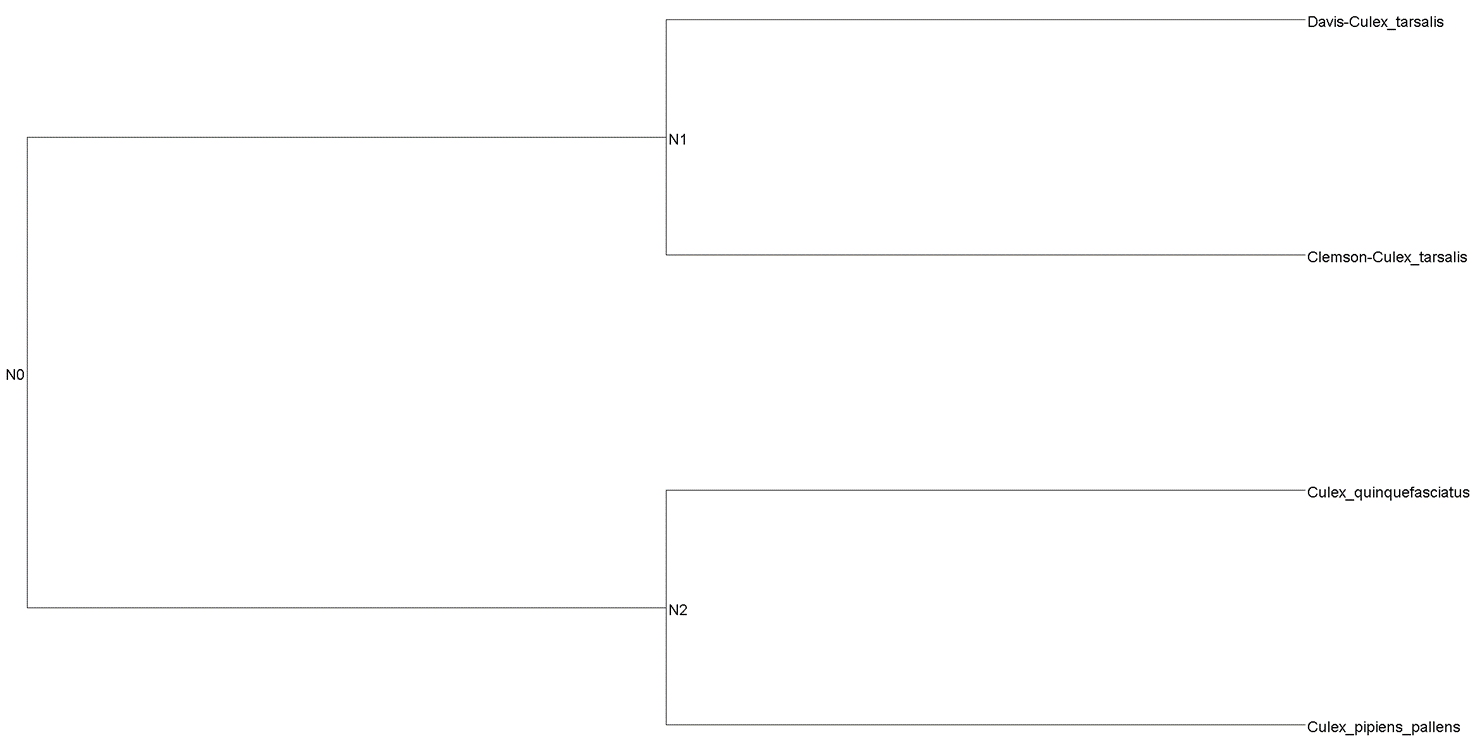

In [20]:
Orthogroups = pd.read_csv("Orthogroups.tsv",sep='\t')
Orthogroups = Orthogroups.fillna('')
Orthogroups.head()

,Orthogroup,Clemson_tarsalis,Culex_quinquefasciatus,Davis_tarsalis,Culex_pipiens
0,OG0000000,"Clemson_tarsalis_Ct.00g000390.m01, Clemson_tar...","Culex_quinquefasciatus_CPIJ003782-PA, Culex_qu...","Davis_tarsalis_mRNA6969, Davis_tarsalis_mRNA8820","Culex_pipiens_00000508-RA, Culex_pipiens_00014..."
1,OG0000001,"Clemson_tarsalis_Ct.00g000420.m01, Clemson_tar...","Culex_quinquefasciatus_CPIJ005359-PA, Culex_qu...",Davis_tarsalis_mRNA14890,"Culex_pipiens_00001767-RA, Culex_pipiens_00002..."
2,OG0000002,"Clemson_tarsalis_Ct.00g000220.m01, Clemson_tar...",Culex_quinquefasciatus_CPIJ014099-PA,"Davis_tarsalis_mRNA8910, Davis_tarsalis_mRNA9390",Culex_pipiens_00004994-RA
3,OG0000003,"Clemson_tarsalis_Ct.00g000010.m01, Clemson_tar...","Culex_quinquefasciatus_CPIJ010419-PA, Culex_qu...",,Culex_pipiens_00007914-RA
4,OG0000004,"Clemson_tarsalis_Ct.00g003100.m01, Clemson_tar...","Culex_quinquefasciatus_CPIJ001417-PA, Culex_qu...",,"Culex_pipiens_00002767-RA, Culex_pipiens_00006..."


***
### <span style="color:lightseagreen">Getting Protein Function Predictive Information With InterProScan</span>
In order to match protein accessions with functional descriptions, InterProScan [[3]](https://doi.org/10.1093/nar/gki442) was used to collect protein functional and predictive information.

In [ ]:
%%script bash --bg
module load interproscan

interproscan.sh -cpu 16 -goterms -i Quinquefasciatus.proteins.fasta -dp -b ./Culex_quinquefasciatus__GOInterProOutput
interproscan.sh -cpu 16 -goterms -i Pipiens.proteins.fasta -dp -b ./Culex_pipiens_pallens__GOInterProOutput
interproscan.sh -cpu 16 -goterms -i Davis_tarsalis.proteins.fasta -dp -b ./Davis-Culex_tarsalis__GOInterProOutput
interproscan.sh -cpu 16 -goterms -i Clemson_tarsalis.proteins.fasta -dp -b ./Clemson-Culex_tarsalis__GOInterProOutput

cat *__GOInterProOutput.tsv > AllGOInterProOutput.tsv

In [4]:
AllGOInterProOutput = pd.read_csv("AllGOInterProOutput.tsv",sep='\t')
AllGOInterProOutput = AllGOInterProOutput.fillna('')
AllGOInterProOutput.head()

,Protein accession,Sequence MD5 digest,Sequence length,Analysis,Signature accession,Signature description,Start location,Stop location,Score,Status,Date,InterPro annotations - accession,InterPro annotations - description,GO_Term
0,Clemson_tarsalis_Ct.00g268710.m01.polypeptide,a2898e6bb199d565e512004fa664eab7,1463,CDD,cd01479,Sec24-like,690,938,3.45499E-116,T,14-06-2022,IPR041742,"Sec24-like, trunk domain",GO:0006886|GO:0006888|GO:0030127
1,Clemson_tarsalis_Ct.00g380650.m01.polypeptide,0a4dfc668b760d2e62d7f5c53f875d31,116,MobiDBLite,mobidb-lite,consensus disorder prediction,101,116,-,T,14-06-2022,-,-,
2,Clemson_tarsalis_Ct.00g380650.m01.polypeptide,0a4dfc668b760d2e62d7f5c53f875d31,116,MobiDBLite,mobidb-lite,consensus disorder prediction,90,116,-,T,14-06-2022,-,-,
3,Clemson_tarsalis_Ct.00g389150.m01.polypeptide,a9e36bff72224f086de97d827976074d,1038,MobiDBLite,mobidb-lite,consensus disorder prediction,970,1000,-,T,14-06-2022,-,-,
4,Clemson_tarsalis_Ct.00g389150.m01.polypeptide,a9e36bff72224f086de97d827976074d,1038,MobiDBLite,mobidb-lite,consensus disorder prediction,859,874,-,T,14-06-2022,-,-,


***
### <span style="color:lightseagreen">Assigning Orthogroups IDs To Functional Descriptions With SQLite</span>
In order to link orthogroups to functional descriptions, SQLite was used to combine Genmap orthogroup and protein accession information with InterProScan protein accession and functional description information, due to file sizes. SQLiteStudio V3.3.3 was used.

To begin, GenMap's Orthogroups.tsv output file, table 'Orthogroups', was compared against each individual mosquito species' adjusted InterProScan's output tsv file, table 'Mosquito'. Using SQLite, orthogroups were combined with protein accessions and descriptions for each mosquito species, and a new table was created for each Culex species, labled 'OGMosquito'.

In [ ]:
%%script sqlite3 --bg
SELECT Orthogroups.Orthogroup, Mosquito."Protein accession", Mosquito.Score, 
Mosquito."Signature description", Mosquito."InterPro annotations - description”
FROM Orthogroups, Mosquito
WHERE Orthogroups.Mosquito LIKE Mosquito."Protein accession"
# export as OGMosquito.txt

Next, the 'OGMosquito' table created previously was analyzed, and was removed of duplicates. A new table was created for each mosquito species, 'OutOGMosquito'.

In [ ]:
%%script sqlite3 --bg
DELETE FROM OGMosquito
WHERE EXISTS (
SELECT 1 FROM OGMosquito p2
WHERE OGMosquito.Column1 = p2.Column1
AND OGMosquito.Column2 = p2.Column2
AND OGMosquito.Column4 = p2.Column4
AND OGMosquito.rowid > p2.rowid
);  
SELECT * FROM OGMosquito
# export as OutOGMosquito.txt

Finally, each of the 4 Culex species tables were combined into 1, table 'OutOGAll.txt'.

In [ ]:
%%script bash --bg
cat OutOGMosquito1.txt OutOGMosquito2.txt OutOGMosquito3.txt OutOGMosquito4.txt >> OutOGAll.txt

In [23]:
OutOGAll = pd.read_csv("OutOGAll.txt",sep='\t')
OutOGAll = OutOGAll.fillna('')
OutOGAll.tail()

,Orthogroup,ProteinAccession,Score,SignatureDescription,InterProAnnotationsDescription
171359,OG0016681,Culex_quinquefasciatus_CPIJ020271-PA,1.1e-30,,
171360,OG0016681,Culex_quinquefasciatus_CPIJ020271-PA,5e-27,Ligated ion channel L-glutamate- and glycine-b...,"Ionotropic glutamate receptor, L-glutamate and..."
171361,OG0016681,Culex_quinquefasciatus_CPIJ020271-PA,4.5e-26,GLUTAMATE RECEPTOR 1,
171362,OG0016681,Culex_quinquefasciatus_CPIJ020271-PA,4.5e-26,IONOTROPIC GLUTAMATE RECEPTOR,
171363,OG0016681,Culex_quinquefasciatus_CPIJ020271-PA,4.13e-19,Periplasmic binding protein-like II,


***
### <span style="color:lightseagreen">Using Natural Language Processing (UniFunc) To Simplify Functional Descriptions</span>
In order to link orthogroups to functional descriptions, Python's Pandas was used to get the dataframe ready for natural language processing programs.

To prepare for the first UniFunc run, GeneIDs were the actual protein accessions, numbered, and the Groups were the non-adjusted protein accessions due to UniFunc accepting only input tsv files containing the columns such as Gene ID, Group, and Description.

In [24]:
nOutOGAll = OutOGAll.groupby(['Orthogroup','ProteinAccession']).agg({'SignatureDescription': ', '.join, 'InterProAnnotationsDescription': ', '.join})
nOutOGAll = nOutOGAll.reset_index(drop=False)
nOutOGAll['Descriptions'] = nOutOGAll[['SignatureDescription', 'InterProAnnotationsDescription']].apply(lambda x: ', '.join(x), axis = 1)
nOutOGAll.drop(['SignatureDescription', 'InterProAnnotationsDescription'], axis=1, inplace=True)

nOutOGAll['Descriptions']= nOutOGAll['Descriptions'].astype(str)
nOutOGAll['Descriptions']= nOutOGAll['Descriptions'].str.replace(', ,', ',')
nOutOGAll['Descriptions']= nOutOGAll['Descriptions'].str.strip(' ')
nOutOGAll['Descriptions']= nOutOGAll['Descriptions'].str.strip("'")
nOutOGAll['Descriptions']= nOutOGAll['Descriptions'].str.rstrip(",")
nOutOGAll['Descriptions']= nOutOGAll['Descriptions'].str.lstrip(",")
nOutOGAll['Descriptions']= nOutOGAll['Descriptions'].str.replace(".","")

df_explode = nOutOGAll.assign(Descriptions=nOutOGAll.Descriptions.str.split(",")).explode('Descriptions').reset_index(level=0, drop=True)
df_explode['Descriptions'] = df_explode['Descriptions'].str.strip()

# how many lines of the file you want for testing: 
    # ex = df_explode.iloc[:1011] for first 1010 lines
df = df_explode.iloc[:]

df['GeneID'] = df['ProteinAccession'] + '_' + df['ProteinAccession'].index.astype(str)
df2 = df[['GeneID', 'ProteinAccession', 'Descriptions']].copy()
df2.rename(columns={"ProteinAccession": "Group", "Description": "Annotations"})

,GeneID,Group,Descriptions
0,Davis_tarsalis_mRNA14890_0,Davis_tarsalis_mRNA14890,consensus disorder prediction
1,Culex_pipiens_00004994-RA_1,Culex_pipiens_00004994-RA,Tetrahydrofolate dehydrogenase/cyclohydrolase ...
2,Culex_pipiens_00004994-RA_2,Culex_pipiens_00004994-RA,FTHFS
3,Culex_pipiens_00004994-RA_3,Culex_pipiens_00004994-RA,Formate--tetrahydrofolate ligase signature 1
4,Culex_pipiens_00004994-RA_4,Culex_pipiens_00004994-RA,NAD_bind_m-THF_DH_Cyclohyd
...,...,...,...
334087,Davis_tarsalis_mRNA14403_334087,Davis_tarsalis_mRNA14403,Zinc finger
334088,Davis_tarsalis_mRNA14403_334088,Davis_tarsalis_mRNA14403,CCCH-type
334089,Culex_pipiens_00017909-RA_334089,Culex_pipiens_00017909-RA,Cadherin_repeat
334090,Culex_pipiens_00017909-RA_334090,Culex_pipiens_00017909-RA,Cadherins domain profile


In [ ]:
df2.to_csv('For_UniFunc_Part1.tsv',index=False, sep='\t')

UniFunc [[4]](https://doi.org/10.1515/hsz-2021-01250) is a text mining tool/language proccessor that analyses similarities between pairs of protein function annotations. Because of the large amount of data still present after duplicates having been removed, UniFunc was ran 2 seperate times. UniFunc V.1.4.5 was used.

The file created previously using Pandas was run by UniFunc with the cluster function as a bash script.

In [25]:
%%script bash --bg
unifunc cluster_function -i For_UniFunc_Part1.tsv -o OutputUniFunc_Part1

To prepare for the second UniFunc run, the OUTPUT_FUNC_CLUSTER results file in cluster_id, score, annotations format, table 'rep_func_cluster', was combined with the Orthogroups.tsv table from the InterProScan output to create a new input file for UniFunc. This time, the file is in the GeneID, Orthogroup, Description format using the the 'Group' from the previous input as the 'GeneID' and the orthogroup as the 'Group'.

In [26]:
%%script sqlite3 --bg
SELECT rep_func_cluster.ProteinAccession, Orthogroups.Orthogroup, rep_func_cluster.Descriptions
FROM rep_func_cluster, Orthogroups
WHERE rep_func_cluster.ProteinAccession = Orthogroups.GeneID
# export as OG_UniFunc_Part2.csv

In [27]:
OG_rep_func_cluster = pd.read_csv("OG_UniFunc_Part2.csv",sep='\t', index_col=False, header=None, names=['GeneID', 'Orthogroup', 'Descriptions'])
OG_rep_func_cluster['GeneID'] = OG_rep_func_cluster['GeneID'] + '_' + OG_rep_func_cluster['GeneID'].index.astype(str)
OG_rep_func_cluster.head()

,GeneID,Orthogroup,Descriptions
0,Davis_tarsalis_mRNA14890_0,OG0000001,consensus disorder prediction
1,Culex_pipiens_00004994-RA_1,OG0000002,Tetrahydrofolate dehydrogenase/cyclohydrolase
2,Culex_quinquefasciatus_CPIJ014099-PA_2,OG0000002,Tetrahydrofolate dehydrogenase/cyclohydrolase
3,Culex_pipiens_00010304-RA_3,OG0000007,consensus disorder prediction
4,Culex_pipiens_00010304-RA_4,OG0000007,Coil


In [ ]:
OG_rep_func_cluster.to_csv('For_UniFunc_Part3.tsv',index=False, sep='\t')

The file created previously using Pandas was run by UniFunc with the cluster function as a bash script.

In [ ]:
%%script bash --bg
unifunc cluster_function -i For_UniFunc_Part3.tsv -o OutputUniFunc_Part3

To analyze the UniFunc results, the OUTPUT_FUNC_CLUSTER results file in cluster_id, score, annotations format, table 'OG_rep_func_cluster', was then combined with the AllAdj_GeneID_Orthogroup_Annotations.tsv table created earlier, table 'OG', to create a new input file for analysis using Pandas.

In [28]:
%%script sqlite3 --bg
SELECT OG_rep_func_cluster.Orthogroup, OG.GeneID, OG_rep_func_cluster.Descriptions
FROM OG_rep_func_cluster, OG
WHERE OG_rep_func_cluster.Orthogroup = OG.Orthogroup
# export as Final_UniFunc_Part4.csv

In [31]:
comb_rep_func_cluster = pd.read_csv("Final_UniFunc_Part4.csv",sep='\t', index_col=False)
comb_rep_func_cluster2 = comb_rep_func_cluster.drop_duplicates(['Orthogroup','Descriptions'],keep= 'first')
max_comb_rep_func_cluster = comb_rep_func_cluster2.assign(count=(comb_rep_func_cluster2["Descriptions"].str.len())).groupby('Orthogroup').max()\
               .drop('count',axis=1)
max_comb_rep_func_cluster.drop(['GeneID'], axis=1, inplace=True)
max_comb_rep_func_cluster = max_comb_rep_func_cluster.reset_index(drop=False)
max_comb_rep_func_cluster

,Orthogroup,Descriptions
0,OG0000001,consensus disorder prediction
1,OG0000002,Tetrahydrofolate dehydrogenase/cyclohydrolase
2,OG0000007,consensus disorder prediction
3,OG0000012,consensus disorder prediction
4,OG0000014,consensus disorder prediction
...,...,...
11258,OG0016745,phbp
11259,OG0016746,consensus disorder prediction
11260,OG0016747,trypsin domain
11261,OG0016754,Zinc finger


In [ ]:
max_comb_rep_func_cluster.to_csv('OG+Descriptions.tsv',index=False, sep='\t')

***
### <span style="color:lightseagreen">References</span>
[1] Emms, D.M., Kelly, S. OrthoFinder: phylogenetic orthology inference for comparative genomics. Genome Biol 20, 238 (2019). https://doi.org/10.1186/s13059-019-1832-y
<br>[2] Daniel H. Huson, Celine Scornavacca, Dendroscope 3: An Interactive Tool for Rooted Phylogenetic Trees and Networks, Systematic Biology, Volume 61, Issue 6, December 2012, Pages 1061–1067, https://doi.org/10.1093/sysbio/sys062
<br>[3] Quevillon, E., Silventoinen, V., Pillai, S., Harte, N., Mulder, N., Apweiler, R., & Lopez, R. (2005). InterProScan: protein domains identifier. Nucleic acids research, 33(Web Server issue), W116–W120. https://doi.org/10.1093/nar/gki442
<br>[4] Queirós, P., Novikova, P., Wilmes, P. & May, P. (2021). Unification of functional annotation descriptions using text mining. Biological Chemistry, 402(8), 983-990. https://doi.org/10.1515/hsz-2021-0125